This is the final model I used to generate the predict and submission after feature engineering or model optimization

In [1]:
import os
import pandas as pd

In [2]:
train_path='/home/ubuntu/learn-with-other-kaggle/data/train.csv'
test_path='/home/ubuntu/learn-with-other-kaggle/data/test.csv'

train_data=pd.read_csv(train_path, index_col = 'Id')
test_data=pd.read_csv(test_path, index_col = 'Id')


train_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

In [4]:
# separate the features with the labels
features_train = train_data.drop('Cover_Type', axis=1)
label_train = train_data['Cover_Type']
features_test = test_data

In [5]:
#if directly features_train_with_hillshad_acc = features_train, then the features_train_with_hillshad_acc['Hillshade_Acc']
# will change the orignal data features_train, so the "=" should be just a pointer change
features_train_with_hillshad_acc = features_train.copy()
features_train_with_hillshad_acc['Hillshade_Acc']=features_train['Hillshade_9am']*features_train['Hillshade_Noon']
features_test_with_hillshad_acc = features_test.copy()
features_test_with_hillshad_acc['Hillshade_Acc']=features_test['Hillshade_9am']*features_test['Hillshade_Noon']

In [6]:
features_train_with_hillshad_acc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Hillshade_Acc
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,51272
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,51700
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,55692
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,56644
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,51480


In [7]:
features_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(features_train, label_train, test_size=0.1)

In [9]:
# Referening some blogs and first change the model to StackingCVClassifier to check if this can improve the performance
#before doing any feature engineering
#https://www.kaggle.com/edumunozsala/feature-eng-and-a-simple-stacked-model
#https://www.kaggle.com/stevegreenau/stacking-multiple-classifiers-clustering
#http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/
from mlxtend.classifier import StackingCVClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score

In [10]:
# After the grid search, I set the n_estimators based on the search result and stacking again
#This is the best model I got until now. Next step is to do the feature engineer
rf_clf = RandomForestClassifier(n_estimators = 200)
lgbm_clf = LGBMClassifier(n_estimators = 400)
ada_cfl = AdaBoostClassifier(n_estimators = 100)
rf_meta = RandomForestClassifier(n_estimators = 100)

labels =['rf','lgbm','ada']
models = {'rf':rf_clf, 'lgbm':lgbm_clf, 'ada':ada_cfl}



stacked_model_with_all_best = StackingCVClassifier(classifiers=[rf_clf,lgbm_clf,ada_cfl],
                             meta_classifier=rf_meta,
                             cv=5,
                             use_probas=True,
                             drop_last_proba=False,
                             use_features_in_secondary=True,
                             verbose=0,
                             store_train_meta_features=True,
                             n_jobs=-1,
                             random_state=0)
stacked_model_with_all_best.fit(x_train,y_train)

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=200,
                                                         n_jobs=

In [11]:
# check the score for the new mode
# use the cross val score
from sklearn.model_selection import KFold, cross_val_score
score = cross_val_score(stacked_model_with_all_best,X=x_valid,y=y_valid, cv=5, scoring='accuracy',verbose=0)
# based on the valid data, it looks the accuracy is a little bitter higher
print("score %f, std %f"%(score.mean(),score.std()))

score 0.762573, std 0.012578


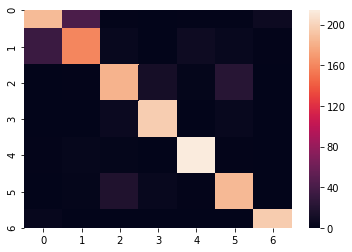

In [12]:
#Today I will do further classification for the type which can not be classified correctly
# check the confusion matrix, the 1&2, 3&6 is confused, I believe this is because the Elevation, I will get out these 
#examples and to classify again
pred = stacked_model_with_all_best.predict(x_valid)
sns.heatmap(confusion_matrix(y_valid, pred))

In [13]:
def get_index_class(cl, examples, pred):
    index = examples.index
    examples["pred"] = pred
    filter_df = examples[examples["pred"].isin(cl)]
    return filter_df

In [14]:
#separate the data 3&6 for new model train training
separate_3_6 = train_data[train_data['Cover_Type'].isin([3,6])]
#separate_others = train_data[train_data['Cover_Type'].isin([1,2,4,5,7])]

In [15]:
#prepare the dataf or type 3, 6
new_x_feature_36 = separate_3_6.drop('Cover_Type', axis=1)
new_y_label_36 = separate_3_6['Cover_Type']
#new_x_feature_other = separate_others.drop('Cover_Type', axis=1)
#new_y_label_other = separate_others['Cover_Type']

In [16]:
x_train_36, x_valid_36,y_train_36, y_valid_36= train_test_split(new_x_feature_36,new_y_label_36, shuffle=True, test_size=0.1)
#x_train_other, x_valid_other,y_train_other, y_valid_other= train_test_split(new_x_feature_other,new_y_label_other, shuffle=True, test_size=0.1)

In [17]:
# the separate train data for type 3, 6
stacked_model_36 = StackingCVClassifier(classifiers=[rf_clf,lgbm_clf,ada_cfl],
                             meta_classifier=rf_meta,
                             cv=5,
                             use_probas=True,
                             drop_last_proba=False,
                             use_features_in_secondary=True,
                             verbose=0,
                             store_train_meta_features=True,
                             n_jobs=-1,
                             random_state=0)

In [18]:
stacked_model_36.fit(x_train_36,y_train_36)

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=200,
                                                         n_jobs=

In [19]:
stacked_model_36.score(x_valid_36,y_valid_36)

0.9004629629629629

In [20]:
stacked_model_with_all_best.score(x_valid_36,y_valid_36)

0.9837962962962963

In [22]:
score = cross_val_score(stacked_model_36,X=new_x_feature_36,y=new_y_label_36, 
                        cv=5, scoring='accuracy',verbose=0, n_jobs=-1)
print("score %f, std %f"%(score.mean(),score.std()))

score 0.841667, std 0.031292


In [21]:
score = cross_val_score(stacked_model_with_all_best,X=new_x_feature_36,y=new_y_label_36, 
                        cv=5, scoring='accuracy',verbose=0, n_jobs=-1)
print("score %f, std %f"%(score.mean(),score.std()))

score 0.842130, std 0.033438


In [25]:
new_x_feature_36.shape

(4320, 54)

In [26]:
x_train.shape

(13608, 54)

In [24]:
import eli5
from eli5.sklearn import PermutationImportance
perimp = PermutationImportance(stacked_model_36, random_state=0).fit(x_valid_36,y_valid_36)
eli5.show_weights(perimp, feature_names = x_valid_36.columns.tolist(), top=100)

Weight,Feature
0.1176 ± 0.0202,Horizontal_Distance_To_Roadways
0.1042 ± 0.0196,Horizontal_Distance_To_Fire_Points
0.0968 ± 0.0179,Elevation
0.0287 ± 0.0177,Horizontal_Distance_To_Hydrology
0.0282 ± 0.0103,Hillshade_Noon
0.0273 ± 0.0061,Hillshade_9am
0.0227 ± 0.0129,Vertical_Distance_To_Hydrology
0.0176 ± 0.0165,Slope
0.0157 ± 0.0126,Soil_Type4
0.0148 ± 0.0104,Aspect


In [28]:
#train the final model
stacked_model_36.fit(new_x_feature_36,new_y_label_36)

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=200,
                                                         n_jobs=

In [29]:
stacked_model_with_all_best.fit(features_train,label_train)

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=200,
                                                         n_jobs=

In [35]:
pred = stacked_model_with_all_best.predict(features_test)

In [36]:
first_result=pd.DataFrame({"Id":features_test.index, "Cover_Type":pred})

In [37]:
first_result.head()

,Id,Cover_Type
0,15121,1
1,15122,2
2,15123,1
3,15124,2
4,15125,1


In [41]:
features_test['Cover_Type']=pred
features_predict_as36 = features_test[features_test['Cover_Type'].isin([3,6])].drop('Cover_Type',axis=1)
features_predict_as36.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
205499,2734,164,27,360,84,824,232,236,116,1315,...,0,0,0,0,0,0,0,0,0,0
205770,2720,170,25,330,70,841,229,241,128,1342,...,0,0,0,0,0,0,0,0,0,0
206037,2709,160,24,300,59,882,236,236,116,1382,...,0,0,0,0,0,0,0,0,0,0
206038,2707,174,21,300,57,858,227,245,139,1369,...,0,0,0,0,0,0,0,0,0,0
206309,2700,156,17,270,50,900,237,239,125,1409,...,0,0,0,0,0,0,0,0,0,0


In [44]:
predict_36=stacked_model_36.predict(features_predict_as36)
result_36=pd.DataFrame({"Id":features_predict_as36.index, "Cover_Type":predict_36})
result_36.head()

,Id,Cover_Type
0,205499,3
1,205770,3
2,206037,3
3,206038,3
4,206309,3


In [67]:
result_36.groupby('Cover_Type').count()

,Id
Cover_Type,
3,36479
6,23521


In [65]:
features_test[features_test['Cover_Type'].isin([3,6])].groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
3,36322,36322,36322,36322,36322,36322,36322,36322,36322,36322,...,36322,36322,36322,36322,36322,36322,36322,36322,36322,36322
6,23678,23678,23678,23678,23678,23678,23678,23678,23678,23678,...,23678,23678,23678,23678,23678,23678,23678,23678,23678,23678


In [50]:
other_result=first_result[first_result['Cover_Type'].isin([1,2,4,5,7])]


In [52]:
final_result=pd.concat([other_result,result_36])

In [56]:
final_result.to_csv('separate_36_predict.csv',index=False)


In [ ]:
# train the model with all the data
stacked_model_with_all_best.fit(features_train_with_hillshad_acc, label_train)

In [ ]:
stack_with_optimized_estimators_number = stacked_model_with_all_best.predict(features_test)

In [ ]:
sub_result_optimize_params=pd.DataFrame({"Id":test_data.index, "Cover_Type":stack_with_optimized_estimators_number})
sub_result_optimize_params.to_csv("stack_op_params_add_hillshad_acc.csv", index=False)
#Your submission scored 0.78408, which is an improvement of your previous score of 0.76535. Great job!
# it means that just optimize the models, there will be some improvement
# Maybe optimze other parameters will help further

In [ ]:
rfcfin = RandomForestClassifier(n_estimators = int(1631.3630739649345),
                                min_samples_split = int(2.4671165024828747),
                                min_samples_leaf = int(1.4052032266878376),
                                max_features = 0.23657708614689418,
                                max_depth = int(426.8410655510125),
                                bootstrap = int(0.8070235824535138),
                                random_state=42)
score = cross_val_score(rfcfin,X=x_valid,y=y_valid, cv=5, scoring='accuracy',verbose=0)
print("score %f, std %f"%(score.mean(),score.std()))

In [ ]:
stack_with_optimized_estimators_number = stacked_model_with_all_best.predict(features_test)

In [ ]:
#Here I will 